In [1]:
# Bloco que realiza os imports necessários para o deploy
import pandas as pd
import streamlit as st
import joblib


# Cria um dicionario contendo todos os campos numéricos neccessários para execução do modelo de previsão
x_numericos = {'latitude': 0, 'longitude': 0, 'accommodates': 0, 'bathrooms': 0, 'bedrooms': 0, 'beds': 0, 'extra_people': 0,
               'minimum_nights': 0, 'ano': 0, 'mês': 0, 'n_amenities': 0, 'host_listings_count': 0}

# Cria um dicionario contendo todos os campos booleanos(True/False) neccessários para execução do modelo de previsão
x_tf = {'host_is_superhost': 0, 'instant_bookable': 0}

# Cria um dicionario contendo todos os campos de categoria (listas suspensas) neccessários para execução do modelo de previsão
x_listas = {'property_type': ['Apartment', 'Bed and breakfast', 'Condominium', 'Guest suite', 'Guesthouse', 'Hostel', 'House', 'Loft', 'Outros', 'Serviced apartment'],
            'room_type': ['Entire home/apt', 'Hotel room', 'Private room', 'Shared room'],
            'cancellation_policy': ['flexible', 'moderate', 'strict', 'strict_14_with_grace_period']
            }

# Dicionario auxiliar que será utilizado para combinar o nome da categoria com o tipo de categoria (item + valor)
dicionario = {}
for item in x_listas: #percorre o dicionario 'x_listas'
    for valor in x_listas[item]: #percorre cada item da lista contida na chave 'item' do dicionario 'x_listas'
        dicionario[f'{item}_{valor}'] = 0 #define o item do dicionário como sendo 'item_valor', conforme as colunas feitas para criar nosso modelo para features com variáveis dummies


# Bloco responsável por armazenar em cada item do dicionario "x_numericos" os valores contidos nos campos do streamlit
for item in x_numericos: #percorre cada item do dicionario "x_numericos"
    if item == 'latitude' or item == 'longitude': #se for o item 'longitude' ou 'latitude'
        valor = st.number_input(f'{item}', step=0.00001, value=0.0, format="%.5f") #armazena o valor contido no formulário streamlit de modo que o formulário contenha números contendo 5 casas dicimais (%.5f) e seja incrementado de 0.00001 em 0.00001 unidade
    elif item == 'extra_people': #se for o item 'extra_people'
        valor = st.number_input(f'{item}', step=0.01, value=0.0) #idem à 'latitude', porém com step de 0.01
    else: #para todos os outros itens
        valor = st.number_input(f'{item}', step=1, value=0) #armazena o valor do formulário, com step=1 e valor padrão sendo um número inteiro (0 sem casas decimais)
    x_numericos[item] = valor #define o valor do item como sendo o valor que foi obtido no formulário do streamlit

# Bloco responsável por armazenar em cada item do dicionario "x_tf" os valores contidos nos campos do streamlit
for item in x_tf: #percorre cada item do dicionario "x_tf"
    valor = st.selectbox(f'{item}', ('Sim', 'Não')) #armazena o valor contido no formulário streamlit, que aceita apenas as opções 'Sim' ou 'Não'
    if valor == "Sim": #caso o valor seja 'Sim'
        x_tf[item] = 1 #define o valor do item do dicionario como sendo 1
    else: #caso contrário
        x_tf[item] = 0 #define o valor do item do dicionario como sendo 0
    
# Bloco responsável por armazenar em cada item do dicionario "x_listas" os valores contidos nos campos do streamlit
for item in x_listas:
    valor = st.selectbox(f'{item}', x_listas[item]) #armazena o valor contido no formulário streamlit, que aceita apenas as opções que existem dentro da lista da chave do dicionario 'x_listas'
    dicionario[f'{item}_{valor}'] = 1 #define o valor do item do 'dicionario' como sendo o que foi obtido no formulário do streamlit 
    
botao = st.button('Prever Valor do Imóvel') #cria o botão responsável por executar o modelo de previsão

if botao: #se o botão for pressionado
    dicionario.update(x_numericos) #acrescenta todo o conteúdo do dicionário 'x_numericos' ao dicionário 'dicionario'
    dicionario.update(x_tf) #idem com o dicionario 'x_tf'
    valores_x = pd.DataFrame(dicionario, index=[0]) #cria um dataframe baseado no 'dicionario'. Ele será utilizado como o conjunto de dados "x" para que o modelo possa prever o preço do imóvel
    
    # Precisamos reordenar as colunas do nosso dataframe para que o modelo se comporte exatamente conforme foi treinado, caso contrário, os resultados da previsão não serão corretos
    dados = pd.read_csv("dados.csv") #realiza a leitura dos dados criados no arquivo do modelo e armazena na variável 'dados'
    colunas = list(dados.columns)[1:-1] #obtém todos os nomes das colunas do dataframe, excluindo a coluna "Unamed" que fora criada automaticamente pelo Python
    valores_x = valores_x[colunas] #reordena as colunas do dataframe conforme o dataframe original tratado no arquivo de treinamento do modelo
    
    modelo = joblib.load('modelo.joblib') #importa nosso modelo de previsão, diretamente do arquivo "modelo.joblib" que criamos no outro notebook
    preco = modelo.predict(valores_x) #armazena o resultado da previsão na variável 'preco'
    st.write(preco[0]) #printa logo abaixo do botão o resultado numérico obtido

2024-05-07 13:13:53.355 WARNING streamlit.runtime.state.session_state_proxy: Session state does not function when running a script without `streamlit run`
2024-05-07 13:13:53.691 
  command:

    streamlit run C:\Users\lucas\anaconda3\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


## Como executar o streamlit?

Para executar o app criado no código acima, precisamos seguir 3 passos simples:

### 1. Salvar este notebook como extensão .py

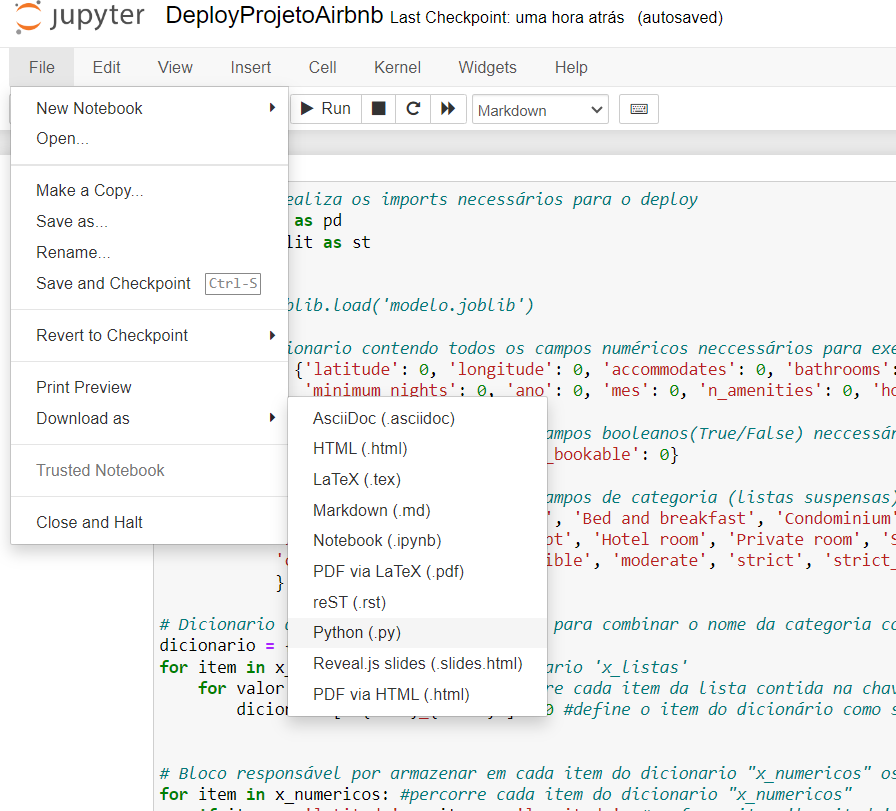

### 2. Abrir o prompt do Anaconda e ir até o diretório onde o arquivo .py foi salvo
- Neste exemplo, o arquivo foi salvo na pasta "Downloads"

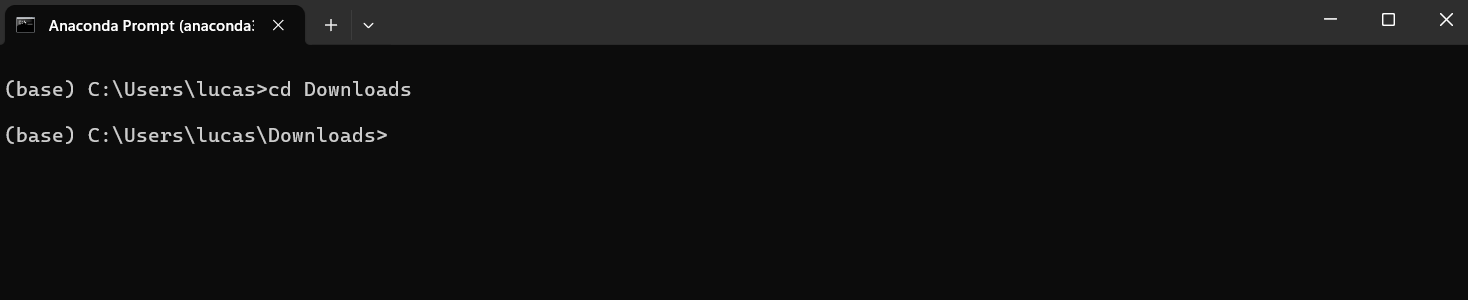

### 3. Executar o app Streamlit, aplicando o comando abaixo no prompt do Anaconda

streamlit run DeployProjetoAirbnb.py

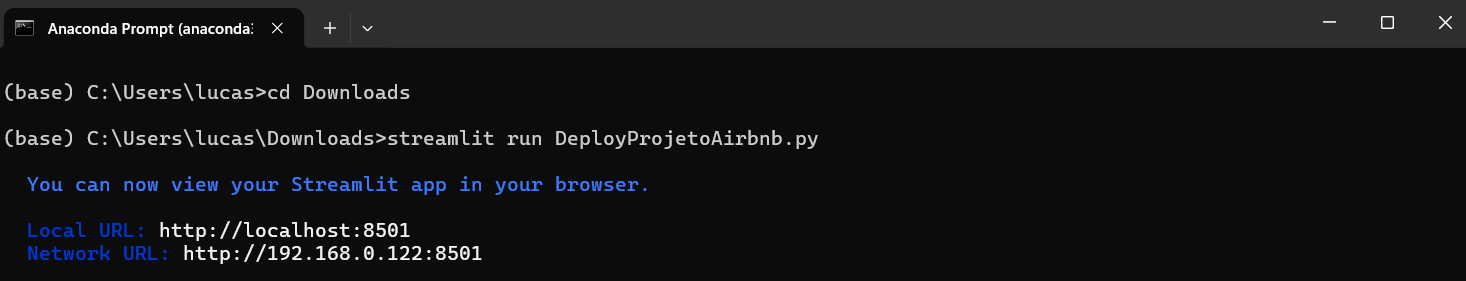

Uma nova página no seu navegador deverá se abrir, revelando a página que criamos aqui neste notebook. Caso não apareça, copie uma das URLs que apareceram no prompt do Anaconda (igual ao do exemplo na imagem acima) e cole na barra de URLs do seu navegador.

A página que abrirá deverá ter este aspecto:

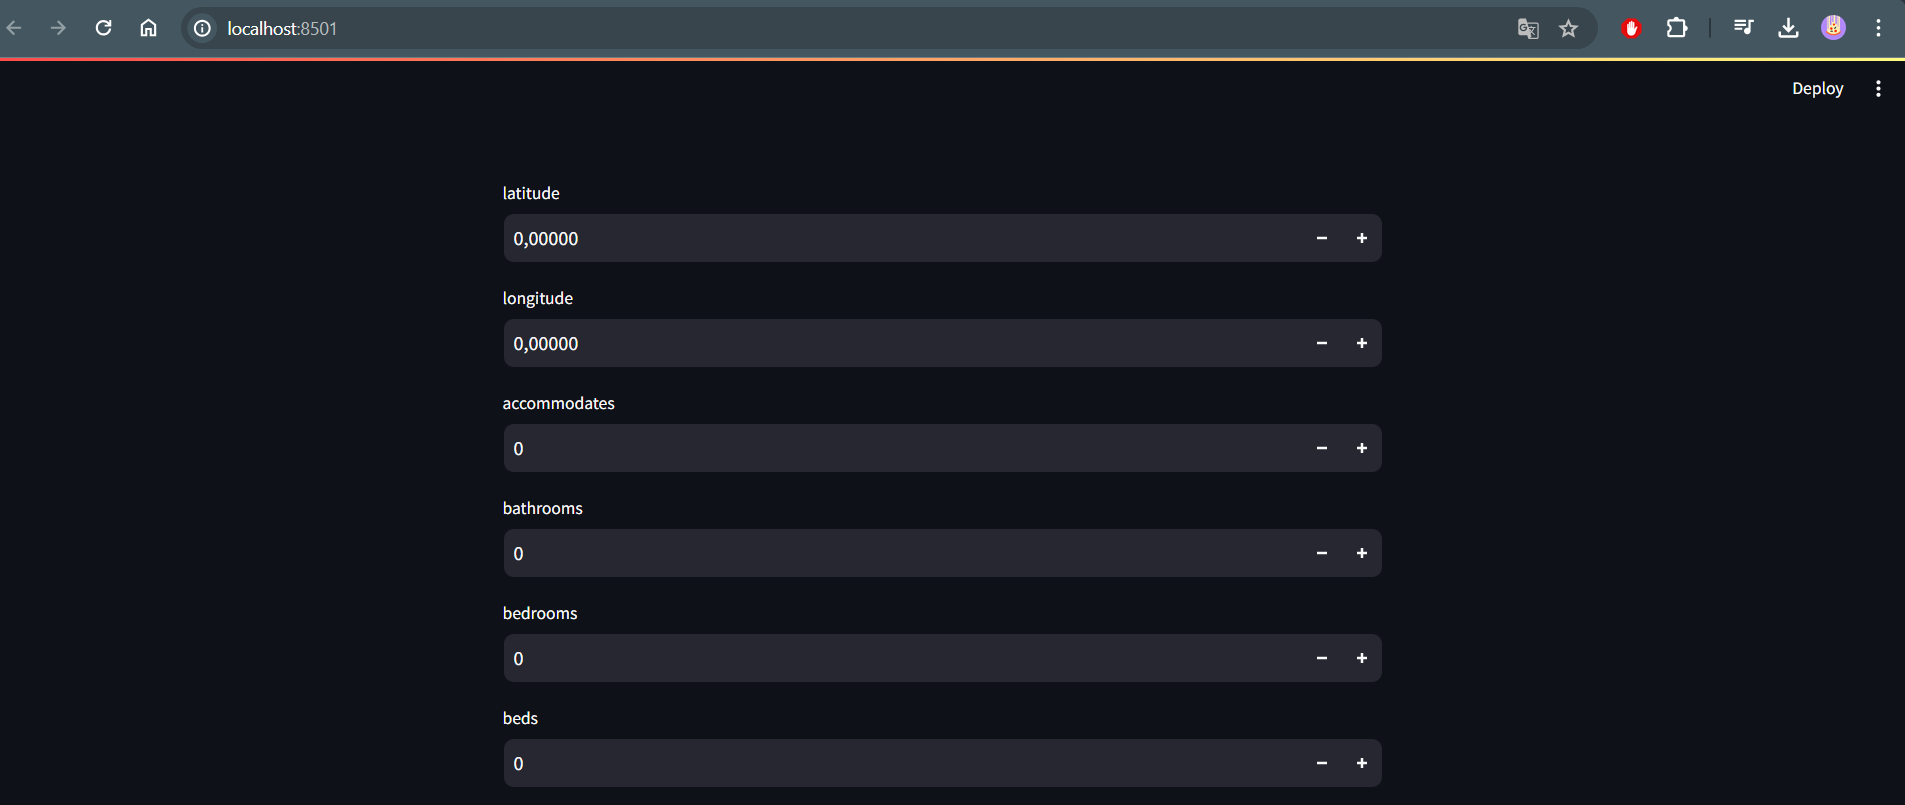

##### Obs: É importante que o arquivo "modelo.joblib" esteja na mesma pasta do arquivo .py (neste exemplo, a pasta "Downloads"), caso contrário, o app resultará em erro ao clicar no botão "Prever Valor do Imóvel".